In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 导入 tensorflow。mnist 数据集工具包
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 载入数据集
# 
# 下载 数据集
# 将标签转换为 one_hot 编码形式
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# tensorflow 版本更新,以前的数据集下载等 方法将不再支持,回警告！！！

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 定义迭代次数
epochs = 30

# 定义每次批次的大小
batch_size = 100
# 定义批次次数
n_batch = mnist.train.num_examples // batch_size

# 定义绘张量图函数
def variable_scalars(var):
    with tf.name_scope('summaries'):
        with tf.name_scope('mean'):
            mean = tf.reduce_mean(var) # 平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean))) # 均方差
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histigram', var) 

# 打印
# print(n_batch)

In [4]:
# 创建 3 个占位符
# 
# 输入样本、输入标签
with tf.name_scope('Input'):
    x = tf.placeholder(dtype=tf.float32, shape=(None, 784), name='x_input')
    y = tf.placeholder(dtype=tf.float32, shape=(None, 10), name='y_input')

In [5]:
# 创建神经网络
# 
# 输入层
with tf.name_scope('layer_1'):
    with tf.name_scope('weigth'):
        weight_L1 = tf.Variable(tf.truncated_normal(shape=(784, 100), mean=0, stddev=0.1), name='w')
        
        variable_scalars(weight_L1)
        
    with tf.name_scope('biase'):
        biase_L1 = tf.Variable(tf.zeros(shape=(1, 100)) + 0.1, name='b')
        
        variable_scalars(biase_L1)
        
    with tf.name_scope('w_plus_b'):
        wx_plus_b_L1 = tf.matmul(x, weight_L1) + biase_L1
        
    with tf.name_scope('tanh'):
        # 双曲正切函数作为激活函数
        L1 = tf.nn.tanh(x=wx_plus_b_L1, name='tanh')

In [6]:
# 输出层
# 
with tf.name_scope('layer_2'):
    with tf.name_scope('weigth'):
        weight_L2 = tf.Variable(tf.truncated_normal(shape=(100, 10), mean=0, stddev=0.1), name='w')
        
        variable_scalars(weight_L2)
        
    with tf.name_scope('biase'):
        biase_L2 = tf.Variable(tf.zeros(shape=(1, 10)) + 0.1, name='b')
        
        variable_scalars(biase_L2)
        
    with tf.name_scope('w_plus_b'):
        wx_plus_b_L2 = tf.matmul(L1, weight_L2) + biase_L2
        
    with tf.name_scope('soft'):
        # 激活函数 tanh()
        prediction = tf.nn.softmax(wx_plus_b_L2)
        

In [7]:
with tf.name_scope('loss'):
    # 损失函数、优化器
    # 
    # 定义损失函数 对数似然代价函数与 soft 组合
    # 
    # 训练时间、准确度有所提升
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction), name='loss')
    tf.summary.scalar('loss', loss)
    
with tf.name_scope('train'):
    # 创建优化器，优化损失函数

    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        # 判断准去率
        # 
        # tf.equal(x, y),判断 x, y 是否相等，返回 bool 类型 (tensor 里的值为 bool)
        # tf.argmax() 查找最大值，返回索引值
        # tensor 的轴(是从 0 开始的)
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1), name='correct')
        
    with tf.name_scope('accuracy'):

        # tf.case() 将 bool 类型,转换为 tf.float 类型
        # 
        # 疑问：acc 为什么 会有 4 位小数，出现呢？(tensor(100, 10), 里面不 1 就是 0)，我怎么感觉顶天就是 2 位小数
        # 解答：准确率是测试集，测试的(10000)张照片,固有 4 位小数出现
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
        
        tf.summary.scalar('accuracy', accuracy)

In [9]:
with tf.name_scope('init'):
    # 初始化图中变量
    init_op = tf.global_variables_initializer()

In [10]:
# 合并所有 summary
merged = tf.summary.merge_all()

Ietr=0   Testing Accuracy=0.9405   loss= 1.5044274
Ietr=1   Testing Accuracy=0.9465   loss= 1.535991
Ietr=2   Testing Accuracy=0.9452   loss= 1.5309926
Ietr=3   Testing Accuracy=0.9556   loss= 1.5318081
Ietr=4   Testing Accuracy=0.9535   loss= 1.5573387
Ietr=5   Testing Accuracy=0.9525   loss= 1.5302936
Ietr=6   Testing Accuracy=0.9557   loss= 1.5000088
Ietr=7   Testing Accuracy=0.9512   loss= 1.4909836
Ietr=8   Testing Accuracy=0.9552   loss= 1.5023111
Ietr=9   Testing Accuracy=0.9541   loss= 1.5089171
Ietr=10   Testing Accuracy=0.9564   loss= 1.5088681
Ietr=11   Testing Accuracy=0.9567   loss= 1.5135499
Ietr=12   Testing Accuracy=0.9572   loss= 1.4646878
Ietr=13   Testing Accuracy=0.9579   loss= 1.4879792
Ietr=14   Testing Accuracy=0.9563   loss= 1.4992185
Ietr=15   Testing Accuracy=0.9619   loss= 1.4914148
Ietr=16   Testing Accuracy=0.9607   loss= 1.4729191
Ietr=17   Testing Accuracy=0.9611   loss= 1.4845654
Ietr=18   Testing Accuracy=0.9569   loss= 1.4984475
Ietr=19   Testing Accur

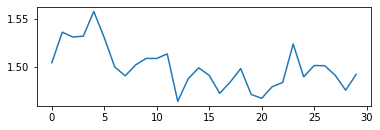

In [11]:
# 创建会话
with tf.Session() as sess:
#     创建 writer，写入日志文件
    writer = tf.summary.FileWriter('logs431/', tf.get_default_graph())

    sess.run(init_op)
#     定义列表存储 loss
#     迭代 21 个周期
    loss_list = []
    lr_list = []
    for epoch in range(epochs):
        for batch in range(n_batch):
#         一个批次获取照片数 batch_size
            train_x, train_y = mnist.train.next_batch(batch_size=batch_size)
           
#             res_loss 为 loss, res_train ?
#             训练迭代时，处最后一层外的其他层有 keep_prob 的比例工作
            res_loss, res_train , res_merge= sess.run([loss, train, merged], feed_dict={x: train_x, y: train_y})
        
#         计算网络 准确率
#         测试 Dropout 设为 1， 全部神经网络都工作
        test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        
#         将所有 summary 写入文件
        writer.add_summary(summary=res_merge, global_step=epoch)
        
#         将每一次迭代 loss 记录
        loss_list.append(res_loss)

        print('Ietr=' + str(epoch) , '  Testing Accuracy=' + str(test_acc), '  loss=', str(res_loss))
        
#     保存
    writer.close()
#   画出 loss-epoch 关系图
    plt.figure()
    plt.subplot(211)
    plt.plot(list(range(epochs)), loss_list)

In [ ]:
# 没有使用 Dropout

# Ietr 0  Testing Accuracy 0.9323   Train Accuracy 0.9346   res_loss= 1.5399612
# Ietr 1  Testing Accuracy 0.9541   Train Accuracy 0.96132725   res_loss= 1.4838237
# Ietr 2  Testing Accuracy 0.9602   Train Accuracy 0.9728909   res_loss= 1.49783
# Ietr 3  Testing Accuracy 0.9632   Train Accuracy 0.97932726   res_loss= 1.4796754
# Ietr 4  Testing Accuracy 0.9679   Train Accuracy 0.9825636   res_loss= 1.4844207
# Ietr 5  Testing Accuracy 0.9698   Train Accuracy 0.9851091   res_loss= 1.4629455
# Ietr 6  Testing Accuracy 0.969   Train Accuracy 0.9863091   res_loss= 1.4843254
# Ietr 7  Testing Accuracy 0.9721   Train Accuracy 0.98794544   res_loss= 1.4735485
# Ietr 8  Testing Accuracy 0.9725   Train Accuracy 0.98905456   res_loss= 1.4721011
# Ietr 9  Testing Accuracy 0.9743   Train Accuracy 0.98965454   res_loss= 1.4730831
# Ietr 10  Testing Accuracy 0.9747   Train Accuracy 0.9900909   res_loss= 1.491473
# Ietr 11  Testing Accuracy 0.9747   Train Accuracy 0.9906545   res_loss= 1.4817348
# Ietr 12  Testing Accuracy 0.9755   Train Accuracy 0.99096364   res_loss= 1.4821503
# Ietr 13  Testing Accuracy 0.9745   Train Accuracy 0.9914   res_loss= 1.4813396
# Ietr 14  Testing Accuracy 0.9763   Train Accuracy 0.99178183   res_loss= 1.473033
# Ietr 15  Testing Accuracy 0.9755   Train Accuracy 0.99203634   res_loss= 1.4718902
# Ietr 16  Testing Accuracy 0.9759   Train Accuracy 0.9923091   res_loss= 1.482006
# Ietr 17  Testing Accuracy 0.9756   Train Accuracy 0.9926182   res_loss= 1.4619377
# Ietr 18  Testing Accuracy 0.9762   Train Accuracy 0.9927818   res_loss= 1.4716164
# Ietr 19  Testing Accuracy 0.976   Train Accuracy 0.9930182   res_loss= 1.501292